# Loading in your own data - deep learning basics with Python, TensorFlow and Keras p.2

https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/?completed=/introduction-deep-learning-python-tensorflow-keras/

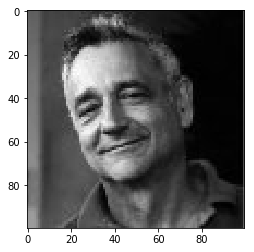

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import time as time
import cv2

DATADIR = "/home/jeffrey/Desktop"

# CATEGORIES = ["good", "bad"]
CATEGORIES = ["good"]

for category in CATEGORIES:  # good and bad
    path = os.path.join(DATADIR,category)  # create path to good  and bad
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [2]:
print(img_array)
print("")
print("size")
print(img_array.shape, " ", end="")
print("")
print("size")
print(img_array.size, " ", end=" ")

[[ 87  85  84 ...   2   2  72]
 [ 88  86  85 ...   2   2  72]
 [ 89  87  86 ...   2   2  72]
 ...
 [141 140 140 ...  20  25  85]
 [141 140 140 ...  22  26  87]
 [141 141 140 ...  25  29  89]]

size
(100, 100)  
size
10000   

standardize the size to 50

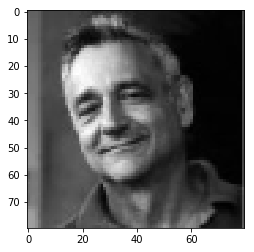

In [3]:
IMG_SIZE = 80

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

(array([23.,  2., 14., 10.,  7.,  4.,  2.,  6.,  4.,  8.]),
 array([  1.,  23.,  45.,  67.,  89., 111., 133., 155., 177., 199., 221.]),
 <a list of 10 Patch objects>)

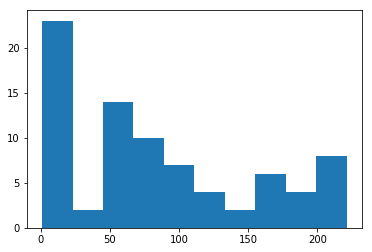

In [4]:
# make a histogram of the shades of the first 25 row
plt.hist(new_array[20])

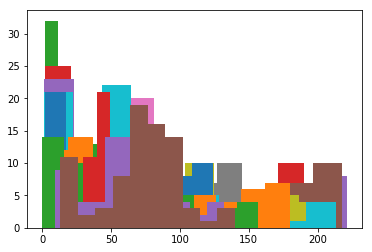

In [5]:
for i in range(new_array.shape[0] -1):
    if i % 5 != 0:
        continue
    else:    
        plt.hist(new_array[i])
        #time.sleep(2)


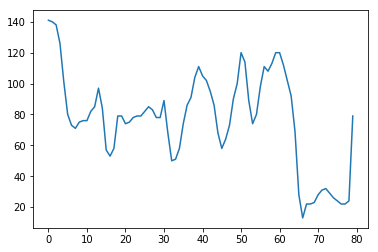

In [6]:

plt.plot(new_array[78])

Adding labels
https://stackoverflow.com/questions/14826119/multiple-legends-in-matplotlib-in-for-loop

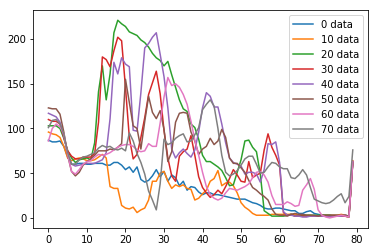

In [7]:
lines = [] 
for i in range(new_array.shape[0] -1):
    if i % 10 != 0: # only printing every x line
        continue
    else:    
         lines += plt.plot(new_array[i], label="{} data".format(i))


labels = [l.get_label() for l in lines]
plt.legend(lines, labels)
plt.show()

#we see below that 20 has the most amount of 'white'

Adding a white line using OpenCV : https://docs.opencv.org/3.1.0/dc/da5/tutorial_py_drawing_functions.html

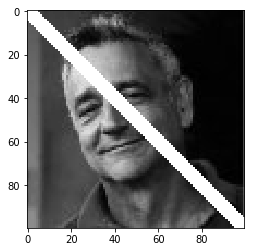

In [8]:
cv2.line(img_array,(0,0),(100,100),(255,0,0),5) # add a white line
plt.imshow(img_array, cmap='gray')  # graph it
plt.show()  # display!

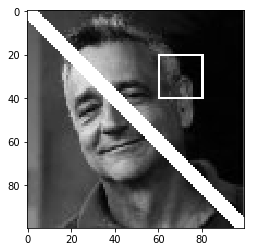

In [9]:
cv2.rectangle(img_array,(60,20),(80,40),(255,255,255),1)
plt.imshow(img_array, cmap='gray')  # graph it
plt.show()

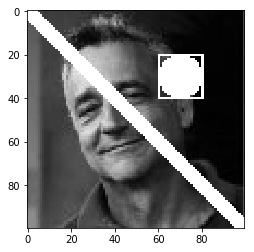

In [10]:
cv2.circle(img_array,(70,30), 10, (255,255,255), -1)
plt.imshow(img_array, cmap='gray')  # graph it
plt.show()   

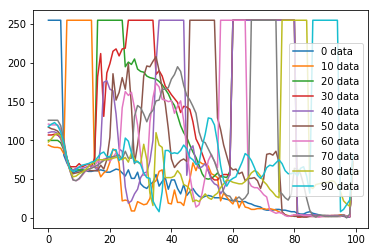

In [11]:
lines = [] 
for i in range(img_array.shape[0] -1):
    if i % 10 != 0: # only printing every x line
        continue
    else:    
         lines += plt.plot(img_array[i], label="{} data".format(i))


labels = [l.get_label() for l in lines]
plt.legend(lines, labels)
plt.show()

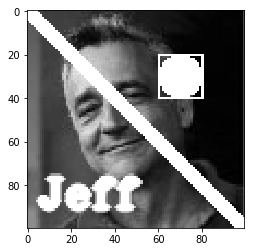

In [18]:
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
cv2.putText(img_array,'Jeff',(5,90), font, 1,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img_array, cmap='gray')  # graph it
plt.show()

make average of linear pixel array - of size step (one dimensional)

In [24]:
step = 5  # will give 20 in each row
avg = np.array([])
for i in range(0, len(img_array[0]), step):
    avg = np.append(avg, np.mean(img_array[0][i:i+step])) #append averaged values to `avg`

print(avg)   #Prints the final result

[255.   66.6  60.8  60.8  60.6  55.4  42.2  46.6  42.   32.2  27.4  24.8
  21.4  16.4  10.4   9.6   6.2   5.2   2.8  16.6]


# reduce the size of the image with this function: 

https://stackoverflow.com/questions/8090229/resize-with-averaging-or-rebin-a-numpy-2d-array

In [38]:
def bin_ndarray(ndarray, new_shape, operation='sum'):
    """
    Bins an ndarray in all axes based on the target shape, by summing or
        averaging.

    Number of output dimensions must match number of input dimensions and 
        new axes must divide old ones.

    Example
    -------
    >>> m = np.arange(0,100,1).reshape((10,10))
    >>> n = bin_ndarray(m, new_shape=(5,5), operation='sum')
    >>> print(n)

    [[ 22  30  38  46  54]
     [102 110 118 126 134]
     [182 190 198 206 214]
     [262 270 278 286 294]
     [342 350 358 366 374]]

    """
    operation = operation.lower()
    if not operation in ['sum', 'mean']:
        raise ValueError("Operation not supported.")
    if ndarray.ndim != len(new_shape):
        raise ValueError("Shape mismatch: {} -> {}".format(ndarray.shape,
                                                           new_shape))
    compression_pairs = [(d, c//d) for d,c in zip(new_shape,
                                                  ndarray.shape)]
    flattened = [l for p in compression_pairs for l in p]
    ndarray = ndarray.reshape(flattened)
    for i in range(len(new_shape)):
        op = getattr(ndarray, operation)
        ndarray = op(-1*(i+1))
    return ndarray

n = bin_ndarray(img_array, new_shape=(20,20), operation="mean")

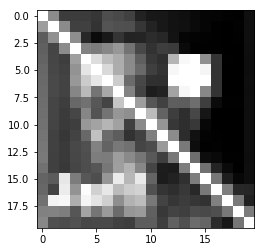

In [37]:
plt.imshow(n, cmap='gray')  # graph it
plt.show()

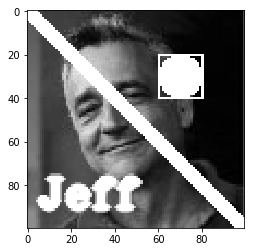

In [35]:
plt.imshow(img_array, cmap='gray')  # graph it
plt.show()